In [185]:
import numpy as np
import pandas as pd

import scipy.stats       as stats
import matplotlib.pyplot as plt

In [178]:
# Cargamos el archivo.
df = pd.read_csv( "../results/NSRDB/19.41_-99.14.csv", index_col = "time",
    parse_dates = True, infer_datetime_format = True )
df

,Temperature,Dew Point,Wind Speed,GHI,Wind Direction
time,,,,,
1998-01-01 00:00:00,5.6,2.8,1.4,0,70.0
1998-01-01 01:00:00,5.3,2.7,1.4,0,65.0
1998-01-01 02:00:00,5.0,2.4,1.4,0,59.0
1998-01-01 03:00:00,4.8,2.2,1.4,0,55.0
1998-01-01 04:00:00,4.5,2.0,1.5,0,52.0
...,...,...,...,...,...
2022-12-31 19:00:00,12.6,3.7,0.9,0,253.0
2022-12-31 20:00:00,11.7,4.1,1.0,0,256.0
2022-12-31 21:00:00,11.5,4.2,0.8,0,263.0


In [ ]:
d = 0
dist_f = [stats.norm, stats.gamma, stats.expon, stats.beta]

dist = dist_f[d]( *dist_f[d].fit( df[ columns[v + 4] ] ) )
print("Kolmogorov-Smirnoff pvalue: " +
    f"{stats.kstest(df[ columns[v + 4] ], dist.cdf)[1]}" )

In [149]:
df.loc[ df.index.month == 1 , df.columns[v] ]

time
1998-01-01 00:00:00    2.8
1998-01-01 01:00:00    2.7
1998-01-01 02:00:00    2.4
1998-01-01 03:00:00    2.2
1998-01-01 04:00:00    2.0
                      ... 
2022-01-31 19:00:00    2.4
2022-01-31 20:00:00    2.6
2022-01-31 21:00:00    2.9
2022-01-31 22:00:00    3.4
2022-01-31 23:00:00    4.0
Name: Dew Point, Length: 18600, dtype: float64

/opt/homebrew/Caskroom/miniforge/base/envs/gv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Distribución seleccionada: Beta
Kolmogorov-Smirnoff pvalue: 0.0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

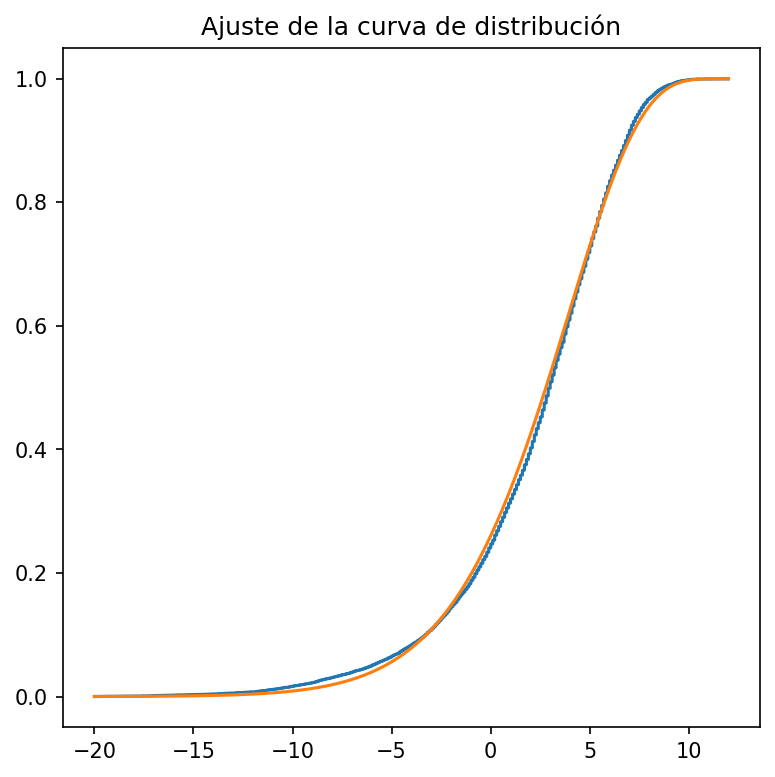

In [165]:
# Seleccionamos la variable.
# 0: Temperature, 1: Dew Point, 2: Wind Speed, 3: GHI, 4: Wind Direction'
v = 1
m = 2
# Seleccionamos una distribución y probamos la bondad de ajuste.
d = 2
dist_f = [ stats.norm, stats.gamma, stats.expon,   stats.beta ]
dist_n = [ "Normal",   "Gamma",     "Exponencial", "Beta"     ]

df_i = df.loc[ df.index.month == m , df.columns[v] ]

dist = dist_f[d]( *dist_f[d].fit( df_i ) )
print(f"Distribución seleccionada: {dist_n[d]}")
print("Kolmogorov-Smirnoff pvalue: " +
    f"{stats.kstest(df_i, dist.cdf)[1]}" )

# Graficamos
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

n = df_i.sort_values()
ax.plot( n, np.linspace( 1 / df_i.shape[0] , 1, df_i.shape[0]) )
ax.plot( n, dist.cdf(n) )

ax.set_title("Ajuste de la curva de distribución")
ax.set_xlim( df_i.min(), df_i.max() )
ax.set_ylim(0, 1)
ax.legend( ["Datos", dist_n[d]] )
fig.tight_layout()
plt.show()